<a href="https://www.kaggle.com/code/jooartursilveira/beginner-heart-attack-eda?scriptVersionId=91255312" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Heart Attack EDA and classifiers
I'm a beginner in data science and this is my first notebook here on Kaggle. Feel free to comment and sugest improvements on the code, analysis methods and the notebook itself.<br/>
For this analysis, I'll use the [Heart Attack Analysis & Prediction Dataset](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset). Let's explore the data and hopefully find some insights

## [EDA section](#EDA)
## [Training section](#Training-classification-models)
## [Conclusion section](#Conclusion)

## EDA

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
heart_csv = '../input/heart-attack-analysis-prediction-dataset/heart.csv'
df_heart = pd.read_csv(heart_csv, sep=',', decimal='.')
df_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**The output column is the predition variable. It's a binary value telling the proness for a heart attack, being 0 a low chance and 1 a high chance**

In [3]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


It's evident that our dataset is only numerical, with only one column being a float and the rest as int. <br/>
Now, let's search for any missing values and the unique values in each column.

In [4]:
#No missing value to handle
df_heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
df_heart.select_dtypes('number').apply(pd.Series.nunique, axis = 0)

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

There's no missing value on the data set, which is great. <br/>
Based on the number of unique values for each column, I'll assume that the categorial variables are the ones with few unique values and the continuous are with a lot of values. <br/> 
I'm not actually sure if this is the right assumption, though, let me know on the comments about this one.

In [6]:
cat_list = ['sex','exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
con_list = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

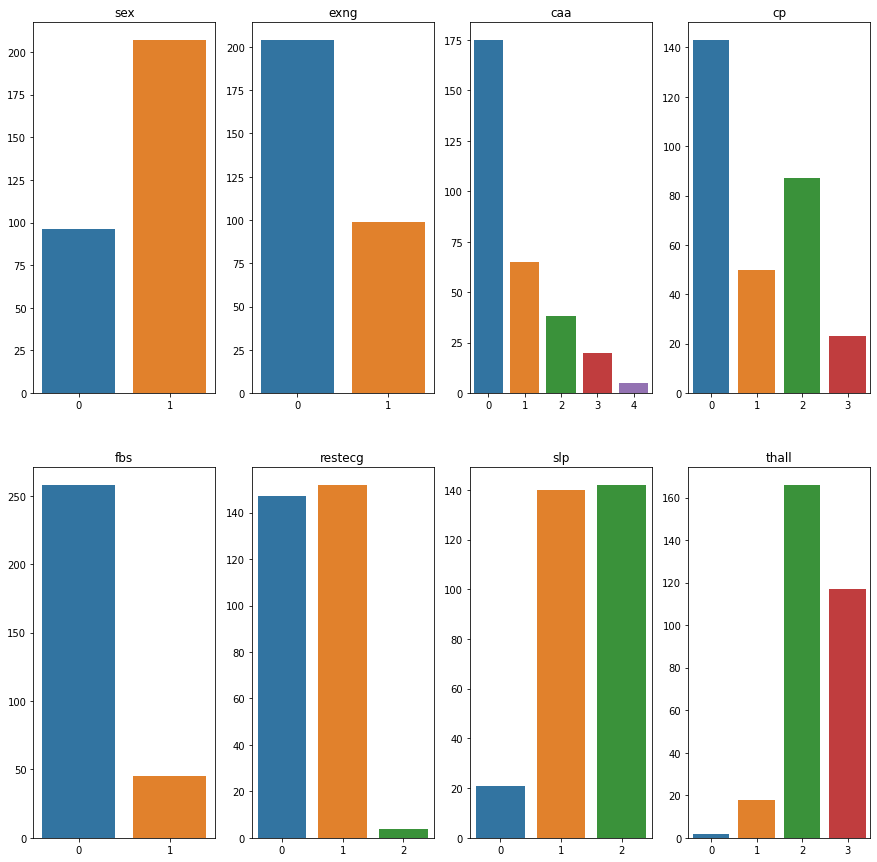

In [7]:
# Countplot of categorial variables
fig = plt.figure(figsize=(15,15))
for i, col in enumerate(cat_list):
    axi = plt.subplot(2, 4, i+1)
    sns.countplot(ax=axi, data=df_heart, x=col).set_title(col)
    axi.set_xlabel('')
    axi.set_ylabel('')

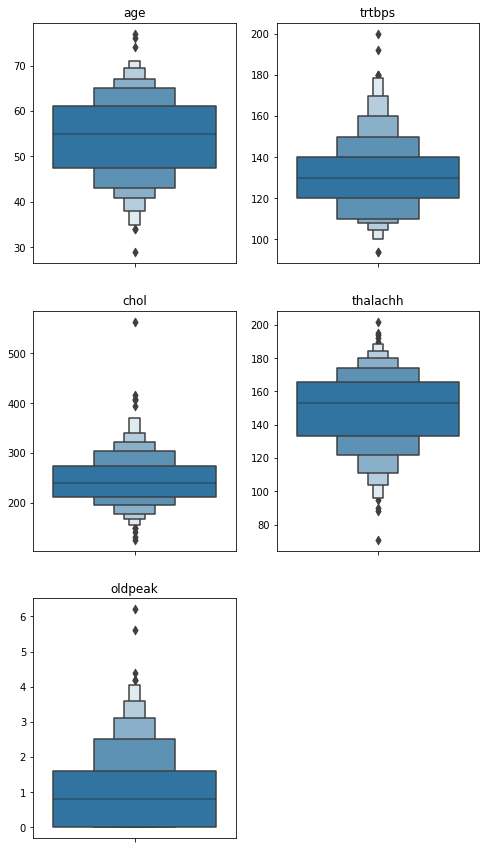

In [8]:
# Boxplot of continuos variable
fig = plt.figure(figsize=(8,15))
for i, col in enumerate(con_list):
    axi = plt.subplot(3, 2, i+1)
    sns.boxenplot(ax=axi, y=df_heart[col]).set_title(col)
    axi.set_ylabel('')

[Text(0, 0, 'low proness'), Text(1, 0, 'high proness')]

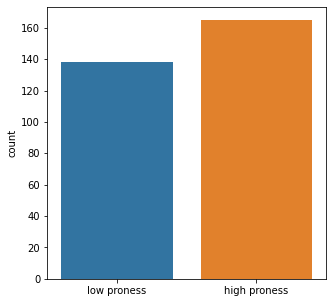

In [9]:
# Plot total 
fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data=df_heart, x='output')
ax.set_xlabel('')
ax.set_xticklabels(['low proness', 'high proness'])

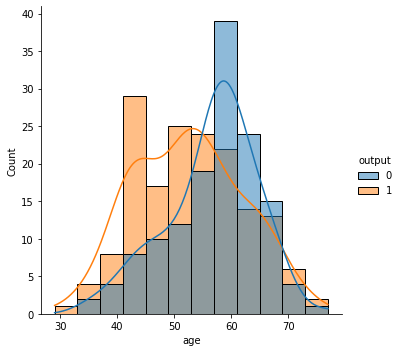

In [10]:
# Plot the histogram based on age and output value
ax=sns.displot(data=df_heart, x='age', hue='output', kde=True)

[Text(0, 0, 'sex 0'), Text(1, 0, 'sex 1')]

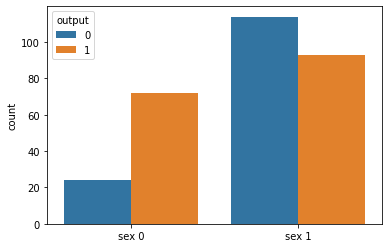

In [11]:
ax=sns.countplot(data=df_heart, x='sex', hue='output')
ax.set_xlabel('')
ax.set_xticklabels(['sex 0', 'sex 1'])

There are more people prone to heart attack. <br/>
It's seems like people below the age around 55 are more prone to a heart attack compared to people above 55. <br/>
The heart attack proness peak is around the age of 45. <br/>
People of sex 0 are 4 times, approximately, more prone to a heart attack.

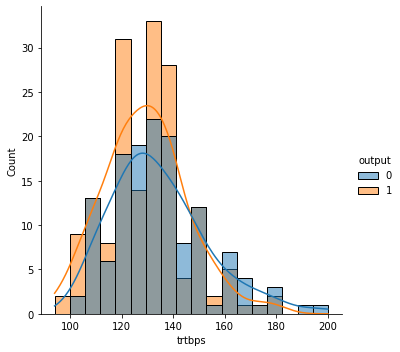

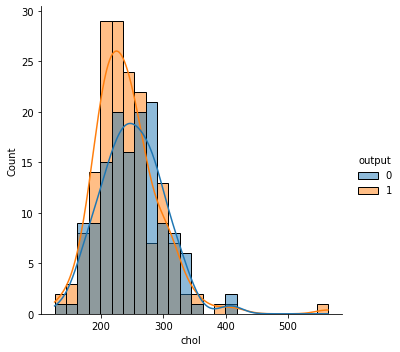

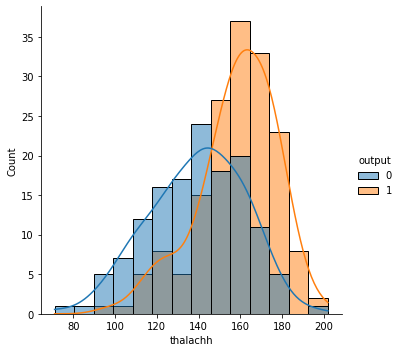

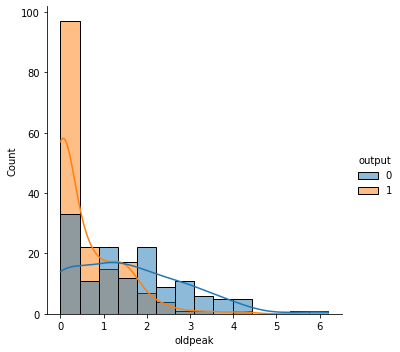

In [12]:
# More distribuitions
for i, col in enumerate(con_list[1::]):
    axi = sns.displot(data=df_heart, x=col, hue='output', kde=True)

People with higher thalachh are more prone to a heart attack. <br/>
People with lower oldpeak are more prone to a heart attack. <br/>
Now, let's look at the correlation between variables and plot the heatmap.


<AxesSubplot:>

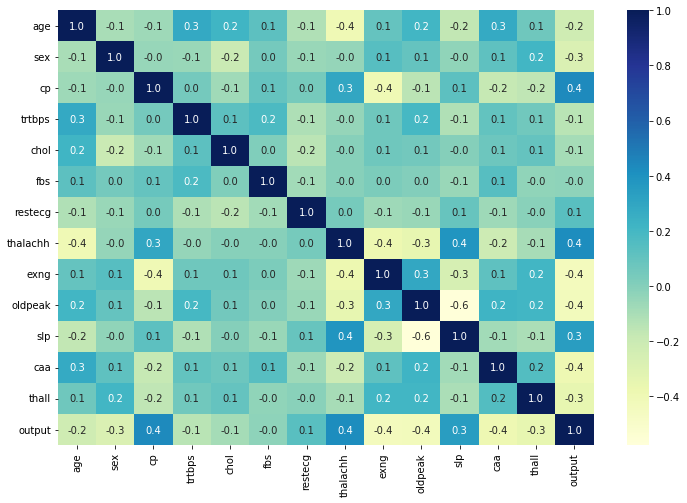

In [13]:
# Correlation matrix and heatplot
df_corr = df_heart.corr()
plt.figure(figsize=(12,8))
sns.heatmap(df_corr, fmt='.1f', annot=True, cmap='YlGnBu')

cp, thalachh and slp have correlation above 0.3 with the output. <br/>
sex, exng, oldpeak, caa, thall have correlation below -0.3 with the output. <br/>
Overall, it seems like the variables don't correlate that much with each other

In [14]:
# Reordering the dataframe for a better visualization before applying pre processing methodos
df_reorder = df_heart.loc[:, cat_list+con_list]
df_reorder.head()

,sex,exng,caa,cp,fbs,restecg,slp,thall,age,trtbps,chol,thalachh,oldpeak
0,1,0,0,3,1,0,0,1,63,145,233,150,2.3
1,1,0,0,2,0,1,0,2,37,130,250,187,3.5
2,0,0,0,1,0,0,2,2,41,130,204,172,1.4
3,1,0,0,1,0,1,2,2,56,120,236,178,0.8
4,0,1,0,0,0,1,2,2,57,120,354,163,0.6


We have 8 categorial variables and only a few of them are binary, like sex, for example. <br/>
A one hot encoding method seems better than a label enconding for this case.

In [15]:
# One hot encoding with pandas dummies
df_dummies = pd.get_dummies(df_reorder , columns=cat_list)
df_dummies.head()

,age,trtbps,chol,thalachh,oldpeak,sex_0,sex_1,exng_0,exng_1,caa_0,...,restecg_0,restecg_1,restecg_2,slp_0,slp_1,slp_2,thall_0,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,0,1,1,0,1,...,1,0,0,1,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,1,0,1,...,0,1,0,1,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0
3,56,120,236,178,0.8,0,1,1,0,1,...,0,1,0,0,0,1,0,0,1,0
4,57,120,354,163,0.6,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0


The continuos variables need scaling, we can see that oldspeak is much smaller than chol, for example. <br/>
Let's use robust scaler from sklearn.

In [16]:
from sklearn.preprocessing import RobustScaler

In [17]:
scaler = RobustScaler()
df_dummies.loc[:, con_list] = scaler.fit_transform(df_dummies.loc[:, con_list])
df_dummies.head()

,age,trtbps,chol,thalachh,oldpeak,sex_0,sex_1,exng_0,exng_1,caa_0,...,restecg_0,restecg_1,restecg_2,slp_0,slp_1,slp_2,thall_0,thall_1,thall_2,thall_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,0,1,1,0,1,...,1,0,0,1,0,0,0,1,0,0
1,-1.333333,0.00,0.157480,1.046154,1.6875,0,1,1,0,1,...,0,1,0,1,0,0,0,0,1,0
2,-1.037037,0.00,-0.566929,0.584615,0.3750,1,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0
3,0.074074,-0.50,-0.062992,0.769231,0.0000,0,1,1,0,1,...,0,1,0,0,0,1,0,0,1,0
4,0.148148,-0.50,1.795276,0.307692,-0.1250,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0


Okay, it looks like the dataset is ready to use. <br/>
Just separate the classification variables as X and the prediction variable as y

In [18]:
X = df_dummies
y = df_heart.loc[:, 'output']

## Training classification models

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# Split the dataframe in train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [21]:
print_shape = lambda x, y: print(f'{x} shape: {y.shape}')

In [22]:
print_shape('X_train', X_train)
print_shape('X_test', X_test)
print_shape('y_train', y_train)
print_shape('y_test', y_test)

X_train shape: (227, 30)
X_test shape: (76, 30)
y_train shape: (227,)
y_test shape: (76,)


In [23]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [24]:
# Most models follow the same coding process: create the model, load the traning set, predict new values and compare the results to calculate the accuracy.
# Therefore, the function below does exactly that, we just need to create the model instance and pass the train and test sets as entries.
def classifier(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    print(f'Accuracy score is: {acc_score}')
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, linewidths=.5, cmap='YlGnBu')

Accuracy score is: 0.8947368421052632


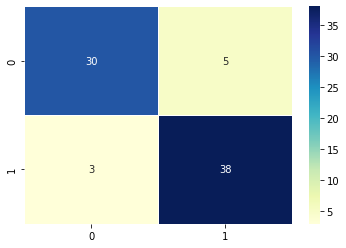

In [25]:
# SVM
svc = SVC()
classifier(svc, X_train, X_test, y_train, y_test)

Accuracy score is: 0.47368421052631576


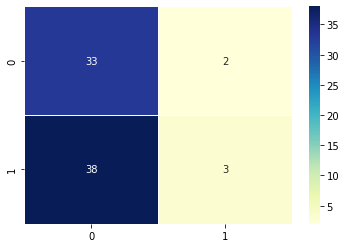

In [26]:
# Naive Bayes
gnb = GaussianNB()
classifier(gnb, X_train, X_test, y_train, y_test)

Accuracy score is: 0.8552631578947368


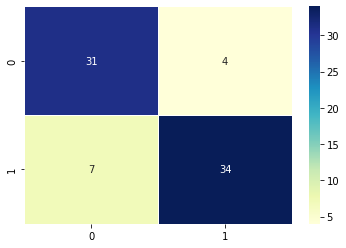

In [27]:
# Bernoulli Naive Bayes
bnb = BernoulliNB()
classifier(bnb, X_train, X_test, y_train, y_test)

Accuracy score is: 0.8552631578947368


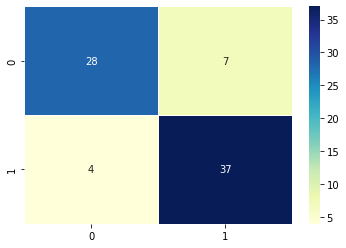

In [28]:
# Logistic Regression
logreg = LogisticRegression()
classifier(logreg, X_train, X_test, y_train, y_test)

Accuracy score is: 0.7368421052631579


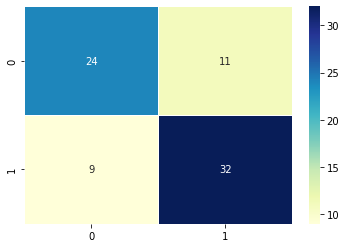

In [29]:
# Decision Tree
tree = DecisionTreeClassifier()
classifier(tree, X_train, X_test, y_train, y_test)

Accuracy score is: 0.8421052631578947


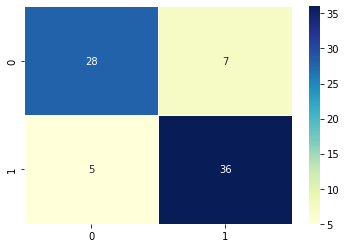

In [30]:
# Random Forest
forest = RandomForestClassifier(n_estimators=100)
classifier(forest, X_train, X_test, y_train, y_test)

## Conclusion
From the [EDA](#EDA) we can conclude that:
* There are more people prone to heart attack.
* It's seems like people below the age around 55 are more prone to a heart attack compared to people above 55.
* The heart attack proness peak is around the age of 45.
* People of sex 0 are 4 times, approximately, more prone to a heart attack.
* People with higher thalachh are more prone to a heart attack.
* People with lower oldpeak are more prone to a heart attack.
* cp, thalachh and slp have correlation above 0.3 with the output. 
* sex, exng, oldpeak, caa, thall have correlation below -0.3 with the output.
* Overall, it seems like the variables don't correlate that much with each other

From the [training](#Training-classification-models) we can conclude that:
* SVM was the best performing model, with a accuracy score of, aproximately, 89.47%
* Maybe I did something wrong with the Naive Bayes model.

Thanks, everyone! As said in the beginning, I would appreciate some sugestions and critics about the analysis, feel free to engage!